In [11]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
import seaborn as sns
import matplotlib.pyplot as plt

What do I eat ? / I am eating an apple
What do I eat ? / I am consuming an orange
What do I eat ? / I am using an apple iphone
----------------------
Whats the battery life ? / I am eating an apple
Whats the battery life ? / I am consuming an orange
Whats the battery life ? / I am using an apple iphone
----------------------
Which phone do you use ? / I am eating an apple
Which phone do you use ? / I am consuming an orange
Which phone do you use ? / I am using an apple iphone
----------------------


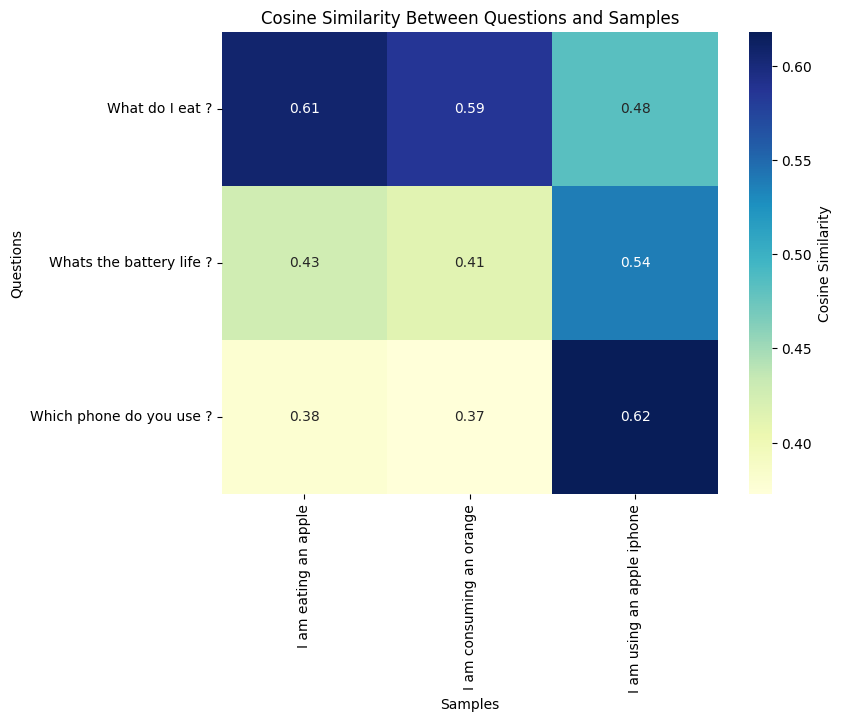

In [12]:
model_name = "BAAI/bge-large-en-v1.5"
embedding_model = HuggingFaceEmbeddings(
    model_name=model_name,
)
apple = "I am eating an apple"
orange = "I am consuming an orange"
apple_iphone = "I am using an apple iphone"

q1 = "What do I eat ?"
q2 = "Whats the battery life ?"
q3 = "Which phone do you use ?"

questions = [q1, q2, q3]
sample = [apple, orange, apple_iphone]

questions_map = {q:embedding_model.embed_query(q) for q in questions}
sample_map = {s:embedding_model.embed_query(s) for s in sample}


import numpy as np
from numpy.linalg import norm
cosine_matrix = []

for q_text, q_embed in questions_map.items():
    row = []
    for s_text, s_embed in sample_map.items():
        print(f"{q_text} / {s_text}")
        cosine = np.dot(q_embed,s_embed)/(norm(q_embed)*norm(s_embed))   
        row.append(cosine) 
    cosine_matrix.append(row) 
    print("----------------------")

# Convert lists to numpy array for better handling
cosine_matrix = np.array(cosine_matrix)

# Plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    cosine_matrix, 
    annot=True, 
    cmap="YlGnBu", 
    xticklabels=sample_map.keys(), 
    yticklabels=questions_map.keys(),
    cbar_kws={'label': 'Cosine Similarity'}
)

# Add titles and labels
plt.title("Cosine Similarity Between Questions and Samples")
plt.xlabel("Samples")
plt.ylabel("Questions")
plt.show()